  
[**Dr. Kevin M. Moerman**](mailto:kevin.moerman@nuigalway.ie), _Lecturer in Biomedical Engineering_   

National University of Ireland Galway.   

---

\newpage

# Learning objectives
At the end of this lecture you should be able to:   

* Formulate Hooke's law in **matrix form**
* Derive spring equations using the **direct method**
* Derive spring equations using a **variational method**

# Hooke's law and the direct (stiffness) method
A two node spring system:   
![spring](spring_2Node.png)  
The force components at node 1 and 2 can be written:   

$f_{1x}=k(u_1-u_2)$   

$f_{2x}=k(u_2-u_1)=-k(u_1-u_2)$    

It is conventient to use matrix notation allowing one to write the above as:
$$\begin{Bmatrix} f_{1x} \\ f_{2x} \end{Bmatrix}=\begin{bmatrix} k & -k \\ -k & k\end{bmatrix}\begin{Bmatrix} u_1 \\ u_2\end{Bmatrix}$$
Which in short form is written:
$$\begin{Bmatrix} F\end{Bmatrix}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u\end{Bmatrix}$$
This introduces the notation $\begin{Bmatrix} \end{Bmatrix}$ and $\begin{bmatrix} \end{bmatrix}$, which represent a column array and a square array respectively.

## Methods for derivation of the finite element equations

* The key finite element equation:
$$\begin{Bmatrix} F\end{Bmatrix}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u\end{Bmatrix}$$
* There are three main types of methods to do so:   
    * The **direct** (equilibrium) method   
        * Simple, intuitive
        * 1D problems
    * **Variational** methods
        * More general
        * Requires existance of a functional to minimize
        * Applies to linear elastic materials
    * **Weighted residual** methods (e.g. Galerkin)
        * Most general 
        * No functional for minization required
        * Applies to non-linear elastic materials
* The direct and variational method are presented in this course

## Matrix multiplication in finite element analysis (FEA)
* Multiplication of two rectangular matrices (summation implied over repeated indices):
$$c_{ij}=a_{ik}b_{kj}$$
* In FEA 
$$\begin{Bmatrix} F\end{Bmatrix}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u\end{Bmatrix}$$
* Involves multiplication of a $n\times p$ matrix and a $n\times1$ array:
$$f_{i}=k_{ip}u_{p}$$
* Quasi-mnemonic to get $f_{i}$ "keep up" $\rightarrow k_{ip}u_{p}$

## Example: A three spring system and a known force \*
Consider the three spring system below. 
* The system consists of 3 spring elements and 4 nodes. 
* Node 1, 3, and 4 are constrained from moving. 
* Spring 2 and 3 act in parallel and both originate from node 2
* The spring stiffnesses are: $k_1=400$, $k_2=k_3=200$
* A force of 25 kN is applied to node 2 in the positive x-direction. 

**Assignment**: Use the direct stiffness method to derive the finite element equations

![3 spring example](springSet_3_force2.png)   
         
\*Based on example 2.3 of: Daryl Logan, _"A First Course in the Finite Element Methods"_ (page 51 in the 6th edition, page 52 in the 5th edition)

### Boundary and compatibility conditions
* The boundary conditions: 
$$u_1=u_3=u_4=0$$
* The compatibility condition:
$$u_2^{(1)}=u_2^{(2)}=u_2^{(3)}=u_2$$


### Setting up the element stiffness matrices
* Using $K^{(i)}=\begin{bmatrix} k_i & -k_i \\ -k_i & k_i\end{bmatrix}$, and $k_1=400$, $k_2=k_3=200$ we come to:

$K^{(1)}=\begin{bmatrix} 400 & -400 \\ -400 & 400\end{bmatrix}$, $K^{(2)}=\begin{bmatrix} 200 & -200 \\ -200 & 200\end{bmatrix}$, and $K^{(3)}=\begin{bmatrix} 200 & -200 \\ -200 & 200\end{bmatrix}$

In [1]:
kSet=[400 200 200]; % The spring stiffness value set
I=[1 -1; -1 1]; % Array for spawning stiffness matrices
k1=kSet(1)*I % Element stiffness matrix 1
k2=kSet(2)*I % Element stiffness matrix 2
k3=kSet(3)*I % Element stiffness matrix 3

k1 =

   400  -400
  -400   400

k2 =

   200  -200
  -200   200

k3 =

   200  -200
  -200   200



### Superposition to assemble global stiffness matrix
Through superposition to global stiffness matrix can be assembled. The superposition is often written as:
$$K=\sum_{i=1}^{3} K^{(i)}$$
However, it should be noted this is not a summation. The below numerical implementation illustrates how **the indices of the nodes involved are used as indices into matrix $K$**, leading to:
$$\begin{bmatrix} K \end{bmatrix}=\begin{bmatrix} 400 & -400 & 0 & 0 \\ -400 & 800 & -200 & -200  \\ 0 & -200 & 200 & 0 \\ 0 & -200 & 0 & 200 \end{bmatrix}$$

In [2]:
K=zeros(4,4); %Initialize stiffness aray with all zeros
K([1 2],[1 2]) = K([1 2],[1 2]) + k1; %Add element 1 contribution
K([2 3],[2 3]) = K([2 3],[2 3]) + k2; %Add element 2 contribution
K([2 4],[2 4]) = K([2 4],[2 4]) + k3; %Add element 3 contribution
K


K =

   400  -400     0     0
  -400   800  -200  -200
     0  -200   200     0
     0  -200     0   200



### Solving for the unknown displacements
* Following derivation of the global stiffness matrix, and using $u_1=u_3=u_4=0$, the total system now becomes:
$$\begin{Bmatrix} F_1 \\ 25000 \\ F_3 \\ F_4 \end{Bmatrix}=\begin{bmatrix} 400 & -400 & 0 & 0 \\ -400 & 800 & -200 & -200  \\ 0 & -200 & 200 & 0 \\ 0 & -200 & 0 & 200 \end{bmatrix}\begin{Bmatrix} 0 \\ u_2 \\ 0 \\ 0\end{Bmatrix}$$
* Leading to: 

$$25000=\begin{bmatrix}-400 & 800 & -200 & -200 \end{bmatrix} \begin{Bmatrix} 0 \\ u_2 \\ 0 \\ 0\end{Bmatrix}\rightarrow 25000=800 u_2 \rightarrow u_2=\frac{25000}{800}$$

In [3]:
F2=25000; %Force at node 2
k22=K(2,2) %Stiffness matrix entry
u2=F2/k22 %Displacement array for node 2 and 3

k22 =  800
u2 =  31.250


### Compute force array F
Since all nodal diplacements are now known the full force array can now be computed from:
$$\begin{Bmatrix} F_1 \\ F_2 \\ F_3 \\ F_4 \end{Bmatrix}=\begin{bmatrix} 400 & -400 & 0 & 0 \\ -400 & 800 & -200 & -200  \\ 0 & -200 & 200 & 0 \\ 0 & -200 & 0 & 200 \end{bmatrix}\begin{Bmatrix} 0 \\ 31.25 \\ 0 \\ 0\end{Bmatrix}=\begin{Bmatrix} -12500 \\ 25000 \\ -6250 \\ -6250 \end{Bmatrix}$$

In [4]:
U=[0; u2; 0; 0] #Full displacement array
F=K*U #Compute force array

U =

    0.00000
   31.25000
    0.00000
    0.00000

F =

  -12500
   25000
   -6250
   -6250



### Computing element forces
The element force data can now be computed too from:
$$\begin{Bmatrix} F^{(i)} \end{Bmatrix}=\begin{bmatrix} k^{(i)}\end{bmatrix}\begin{Bmatrix} u^{(i)} \end{Bmatrix}$$   
  
E.g.:   

$$\begin{Bmatrix} f_{1x}^{(1)} \\ f_{2x}^{(1)} \end{Bmatrix}=\begin{bmatrix} k_1 & -k_1 \\ -k_1 & k_1\end{bmatrix}\begin{Bmatrix} u_1 \\ u_2\end{Bmatrix}$$
$$\begin{Bmatrix} f_{2x}^{(2)} \\ f_{3x}^{(2)} \end{Bmatrix}=\begin{bmatrix} k_2 & -k_2 \\ -k_2 & k_2\end{bmatrix}\begin{Bmatrix} u_2 \\ u_3\end{Bmatrix}$$
$$\begin{Bmatrix} f_{2x}^{(3)} \\ f_{4x}^{(3)} \end{Bmatrix}=\begin{bmatrix} k_3 & -k_3 \\ -k_3 & k_3\end{bmatrix}\begin{Bmatrix} u_2 \\ u_4\end{Bmatrix}$$

In [5]:
f1=k1*U([1 2]) %Element 1 forces
f2=k2*U([2 3]) %Element 2 forces
f3=k3*U([3 4]) %Element 3 forces

f1 =

  -12500
   12500

f2 =

   6250
  -6250

f3 =

   0
   0



# Mechanical applications: e.g. Hooke's law
$$F=ku$$   
  
$F$: Force in Newton (N)  
$k$: Spring stiffness constant (N/m)   
$u$: Spring extension (displacement of end point) (m)

![](HOOKE_LAW.png)

$$\begin{Bmatrix} f_{1} \\ f_{2} \end{Bmatrix}=\begin{bmatrix} k & -k \\ -k & k\end{bmatrix}\begin{Bmatrix} u_1 \\ u_2\end{Bmatrix}\rightarrow \begin{Bmatrix} F\end{Bmatrix}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u\end{Bmatrix}$$


# Electrical applications: e.g. Ohm's law
$$V=RI$$   
  
$V$: Potential or voltage drop in volts (V)   
$R$: Resistance in Ohms ($\Omega$)   
$I$: Electric current in amperes (amps)   

![](OHM_LAW.png)

$$\begin{Bmatrix} V_{1} \\ V_{2} \end{Bmatrix}=\begin{bmatrix} r & -r \\ -r & r\end{bmatrix}\begin{Bmatrix} I_1 \\ I_2\end{Bmatrix}\rightarrow \begin{Bmatrix} V\end{Bmatrix}=\begin{bmatrix} R \end{bmatrix}\begin{Bmatrix} I\end{Bmatrix}$$

# Beyond 1D springs, introducing trusses

## The spring element
![spring](spring_2Node.png)     
* Behaviour Hooke's law for a spring: 
$$F=ku$$   
$$\begin{Bmatrix} f_{1} \\ f_{2} \end{Bmatrix}=k\begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix}\begin{Bmatrix} u_1 \\ u_2\end{Bmatrix}$$
* Spring is a 1D "line element"and has no thickness


## The truss element
![spring](truss1.png)  
* Behaviour Hooke's law for a bar: 
$$\sigma=E\epsilon=\frac{F}{A}$$   
$$\begin{Bmatrix} f_{1} \\ f_{2} \end{Bmatrix}=\frac{AE}{L}\begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix}\begin{Bmatrix} u_1 \\ u_2\end{Bmatrix}$$
* Truss (or bar) is a 1D element but has a **cross-sectional area** $A$

$\sigma$: Stress (Pa or $N/m^2$)   
$F$: Force (N)   
$E$: The material Young's Modulus (Pa or $N/m^2$)   
$\epsilon$: The strain in the material ([])   
$L$ truss lenght (m)

# Strain
* **strain** a relative metric for deformation: 
$$\epsilon=\frac{du(x)}{dx}=\frac{(u_2-u_1)}{L_0}$$    
* **stretch** or stretch-ratio, current ($L$) over initial length ($L_o$): 
$$\lambda=\frac{L}{L_0}=\frac{L_0+(u_2-u_1)}{L_0}=\frac{(u_2-u_1)}{L_0}+1$$      

# Side notes on strain
* Different strain metrics exist, focus in this course is linear (or Biot) strain
* **Linear (or Biot) strain**:
    $$\epsilon=\lambda-1=\frac{(u_2-u_1)}{L_0}$$
* **Green-Lagrange strain**:
    $$\epsilon_{GL}=\frac{1}{2}(\lambda^2-1)$$
* **Logarithmic (or true or natural or Hencky) strain**:
    $$\epsilon_{log}=\ln(\lambda)$$

* **Seth-Hill class of strains**:
    $$E^{(m)}=\frac{1}{m}(\lambda^m-1)$$        
    ![spring](strainsMoerman.jpg)  

See: [Moerman et al. 2016](https://arxiv.org/pdf/1512.03654.pdf)

# The truss (or bar) element 
![spring](truss2.png)  
* Stress (force acting over area) constitutive law: 
$$\sigma=E\epsilon=\frac{F}{A}$$      
* Force in the truss: $F=AE\epsilon$, therefore:
$$T=AE\frac{(u_2-u_1)}{L}=\frac{AE}{L}(u_2-u_1)$$
* The nodal forces:
$$f_{1}=-T=\frac{AE}{L}(u_1-u_2)$$
     
$$f_{2}=T=\frac{AE}{L}(-u_1+u_2)$$
* Expressed in matrix form:
$$\begin{Bmatrix} f_{1} \\ f_{2} \end{Bmatrix}=\frac{AE}{L}\begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix}\begin{Bmatrix} u_1 \\ u_2\end{Bmatrix}$$

## Example: A three spring system and a known force
Consider the three truss system below. 
* The system consists of 3 truss elements and 4 nodes. 
* Node 1, 3, and 4 are constrained from moving. 
* Truss 2 and 3 act in parallel and both originate from node 2
* All truss lengths $L_i=1$
* The truss Youngs Moduli are: $E_1=100$, $E_2=100$, and $E_3=200$
* The truss cross sectional areas are: $A_1=4$, $A_2=2$, and $A_3=1$
* A force of 25 kN is applied to node 2 in the positive x-direction. 

**Assignment**: 
1. Form the element stiffness matrices
2. Use the direct stiffness method to derive the global stiffness matrix and the finite element equations
![3 spring example](trussSet_3_force2.png)   

### Boundary and compatibility conditions
* The boundary conditions: 
$$u_1=u_3=u_4=0$$
* The compatibility condition:
$$u_2^{(1)}=u_2^{(2)}=u_2^{(3)}=u_2$$


### Setting up the element stiffness matrices
* Recognize: 
$$K^{(i)}=\frac{A^{(i)}E^{(i)}}{L^{(i)}}\begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix}=k^{(i)}\begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix}$$   
   
$$k^{(1)}=\frac{A^{(1)}E^{(1)}}{L^{(1)}}=\frac{4*100}{1}=400$$
$$k^{(2)}=\frac{A^{(2)}E^{(2)}}{L^{(2)}}=\frac{2*100}{1}=200$$
$$k^{(3)}=\frac{A^{(3)}E^{(3)}}{L^{(3)}}=\frac{1*200}{1}=200$$

* Using $K^{(i)}=\begin{bmatrix} k_i & -k_i \\ -k_i & k_i\end{bmatrix}$, and $k_1=400$, $k_2=k_3=200$ we come to:

$K^{(1)}=\begin{bmatrix} 400 & -400 \\ -400 & 400\end{bmatrix}$, $K^{(2)}=\begin{bmatrix} 200 & -200 \\ -200 & 200\end{bmatrix}$, and $K^{(3)}=\begin{bmatrix} 200 & -200 \\ -200 & 200\end{bmatrix}$

### Superposition to assemble global stiffness matrix
Through superposition to global stiffness matrix can be assembled. The superposition is often written as:
$$K=\sum_{i=1}^{3} K^{(i)}$$
However, it should be noted this is not a summation. The below numerical implementation illustrates how **the indices of the nodes involved are used as indices into matrix $K$**, leading to:
$$\begin{bmatrix} K \end{bmatrix}=\begin{bmatrix} 400 & -400 & 0 & 0 \\ -400 & 800 & -200 & -200  \\ 0 & -200 & 200 & 0 \\ 0 & -200 & 0 & 200 \end{bmatrix}$$

### Solving for the unknown displacements
* Following derivation of the global stiffness matrix, and using $u_1=u_3=u_4=0$, the total system now becomes:
$$\begin{Bmatrix} F_1 \\ 25000 \\ F_3 \\ F_4 \end{Bmatrix}=\begin{bmatrix} 400 & -400 & 0 & 0 \\ -400 & 800 & -200 & -200  \\ 0 & -200 & 200 & 0 \\ 0 & -200 & 0 & 200 \end{bmatrix}\begin{Bmatrix} 0 \\ u_2 \\ 0 \\ 0\end{Bmatrix}$$
* Leading to: 

$$25000=\begin{bmatrix}-400 & 800 & -200 & -200 \end{bmatrix} \begin{Bmatrix} 0 \\ u_2 \\ 0 \\ 0\end{Bmatrix}\rightarrow 25000=800 u_2 \rightarrow u_2=\frac{25000}{800}$$

# Linear truss shape functions
* Shape functions are convenient for interpolation of quantities between nodes. 
* Linear interpolation between two nodes simply involves a weighted average of values between two nodes. 
* Shape functions define this "weighting"
* To determine the displacement for a coordinate $x$ between two nodes on a truss the interpolation is written: 
$$u(x)=N_1(x)u_1+N_2(x)u_2$$
* Here $N_1$ and $N_2$ are the so-called shape functions and are defined as: 
$$N_1=\frac{x_2-x}{L}$$
  
$$N_2=\frac{x-x_1}{L}$$

With 
$$N_1+N_2=1$$

![](truss1.png)

* If instead of 1, and 2, we use i and j then we obtain: 
$$N_i=\frac{x_j-x}{L}$$
  
$$N_j=\frac{x-x_i}{L}$$

With 
$$N_i+N_j=1$$

* If conveniently the nodal coordinates are $x_i=0$ and $x_j=L$ we obtain: 
$$N_i=1-\frac{x}{L}$$
  
$$N_j=\frac{x}{L}$$

With 
$$N_i+N_j=1$$


![](truss2_2D_02.png)

## Shape functions for interpolation
Consider a 2-noded 1D truss with: $A=2$, $E=50$, $L=10$. The truss has 2 nodes, node-i is at $x_i=2$, and node-j is at $x_j=12$. Assume the nodes undergo the following displacements $u_i=2$, $u_j=3$. 

**Assignment**: 
1. Derive the linear truss shape functions $N_1$ and $N_2$
2. Show the shape functions sum to 1
3. Use the shape functions to determine (i.e. interpolate) the displacement at $x=4.5$, $x=7$ and $x=9.5$


![](truss2_2D_02.png)

### Solution

x =

    2.0000    4.5000    7.0000    9.5000   12.0000

ux =

   1   2   3   4   5



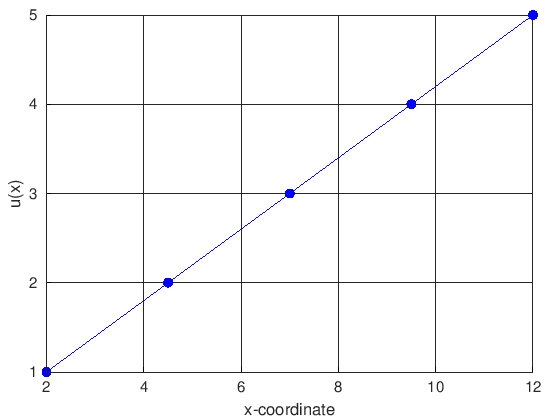

In [6]:
L=10; %The length
x1=2; %x-coordinate of node 1
x2=12; %x-coordinate of node 2
u1=1; %Displacement at node 1
u2=5; %Displacement at node 2

x=linspace(x1,x2,5) %test coordinates from x1 to x2
N1 = @(x) (x2-x)/L; %Shape function 1
N2 = @(x) (x-x1)/L; %Shape function 2
ux=N1(x)*u1 + N2(x)*u2

%Visualize
figure; hold on; %Open figure
xlabel('x-coordinate','FontSize',25); ylabel('u(x)','FontSize',25)%Add labels
plot(x,ux,'b.-','LineWidth',3,'markerSize',25); %Plot graph
set(gca,'FontSize',15); grid on; axis tight; %Axis options

## Shape functions for direct computation of "derived quantities"

Recall the definition of strain for a 1D truss element: 
$$\varepsilon(x)=\frac{du(x)}{dx}$$
However since we can express $u(x)$ using the shape functions: 
$$u(x)=N_i(x)u_i+N_j(x)u_j=\bigg(\frac{x_j-x}{L}\bigg)u_i+\bigg(\frac{x-x_i}{L}\bigg)u_j$$


Can we directly express strain and strain interpolation using the derivative of the shape functions? **Yes!**  
  
$$\varepsilon(x)=\frac{du(x)}{dx}=\frac{d}{dx}\big(N_i(x)u_i+N_j(x)u_j\big)=\frac{dN_i(x)}{dx}u_i+\frac{dN_j(x)}{dx}u_j$$   
  
$$\rightarrow \varepsilon=-\frac{1}{L}u_i+\frac{1}{L}u_j$$

## Harnessing the power of matrix algebra

In matrix notation the shape functions can be written (if $x_i=0$ and $x_j=L$): 
 
$$\begin{bmatrix} N \end{bmatrix}=\begin{bmatrix} 1-\frac{x}{L} & \frac{x}{L}\end{bmatrix}$$

Therefore rather than $u(x)=N_i(x)u_i+N_j(x)u_j=$ we can now write
$$u(x)=\begin{bmatrix} N(x) \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}$$

Furthermore, we can introduce the so-called B-matrix for strain computation:

$$\begin{bmatrix} B \end{bmatrix}=\begin{bmatrix} -\frac{1}{L} & \frac{1}{L}\end{bmatrix}$$

Allowing us use the following instead of $\varepsilon=-\frac{1}{L}u_i+\frac{1}{L}u_j$: 

$$\varepsilon=\begin{bmatrix} B \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}$$

**Observations:** 
1. Shape functions allow for determination (interpolation) of quantities between nodes
2. If derivatives are required these can be formulated on the shape functions directly
3. For a linear truss the strain is constant across the element

## Shape functions for interpolation
Consider a 2-noded 1D truss with: $A=2$, $E=50$, $L=10$. The truss has 2 nodes, node-i is at $x_i=2$, and node-j is at $x_j=12$. Assume the nodes undergo the following displacements $u_i=2$, $u_j=3$. 

The shape functions are given by: 
$$N_i=\frac{x_j-x}{L}$$
  
$$N_j=\frac{x-x_i}{L}$$


**Assignment**: 
1. Show these are a proper set of shape functions
2. Componse the shape function matrix and the B-matrix
3. Use matrices to compute the displacement at x=7 and determine the truss strain


![](truss2_2D_02.png)

### Solution

In [7]:
L=10; %The length
x1=2; %x-coordinate of node 1
x2=12; %x-coordinate of node 2
u1=2; %Displacement at node 1
u2=3; %Displacement at node 2
u=[u1; u2] %The displacement array
x=7; %The x-coordinate to evaluate the data at

%Compose shape function matrix
N1 = @(x) (x2-x)/L; %Shape function 1
N2 = @(x) (x-x1)/L; %Shape function 2
N  = @(x) [N1(x) N2(x)] %Shape function matrix

%Interpolate/determine displacement
ux=N(x)*u

u =

   2
   3

N =

@(x) [N1(x), N2(x)]

ux =  2.5000


In [8]:
B=[-1/L 1/L] %The B-matrix
e=B*u %Strain computation

B =

  -0.10000   0.10000

e =  0.10000


# Summary 

* A truss or bar element is a line-like element with an associated area and initial length
![spring](truss1.png)  

* Mechanical behaviour here linear elastic as per Hooke's law: 
$$\sigma=E\epsilon=\frac{F}{A}$$   

* Element equations and assembly using direct method comparible to spring equations with $$k^{(i)}=\frac{A^{(i)}E^{(i)}}{L^{(i)}}$$

* Hence *effective stiffness* of a structure is due to material constants ($E$) **AND** geometry ($A$, and $L$)

* For instance: 
$$\begin{Bmatrix} f_{1} \\ f_{2} \end{Bmatrix}=\frac{AE}{L}\begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix}\begin{Bmatrix} u_1 \\ u_2\end{Bmatrix}$$
    
     
* Shape functions can be used as nodal data interpolators e.g.: 
$N_i=\frac{x_j-x}{L}$, and $N_j=\frac{x-x_i}{L}$

$$u(x)=\begin{bmatrix} N(x) \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}$$

* Shape function derivatives can be pre-computed and enable strain computation e.g.: 
$$\begin{bmatrix} B \end{bmatrix}=\begin{bmatrix} -\frac{1}{L} & \frac{1}{L}\end{bmatrix}$$

$$\varepsilon=\begin{bmatrix} B \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}$$

\newpage

**About this document**    

This document was created using a [Jupyter notebook](https://jupyter.org/) which allows for the presentation of theory and equations, as well as live (running code) numerical implementations. 

This Jupyter notebook is available [open source](https://github.com/Kevin-Mattheus-Moerman/NUIG_BME_402_6101) and features the [Octave](https://www.gnu.org/software/octave/index) programming language (an open source alternative to MATLAB). If you are interested in running this Jupyter notebook yourself [download and install Octave](https://www.gnu.org/software/octave/download) and install [the Jupyter environment](https://jupyter.org/install). Once both Jupyter and Octave are installed follow [these instructions](https://github.com/calysto/octave_kernel) to configure the use of Octave with Jupyter notebooks. 

To run Jupyter call `jupyter notebook` from your Terminal/Command Prompt. 